In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
raw = pd.read_csv ("../datasets/MiningProcess_Flotation_Plant_Database.csv", header=0, decimal=',')

In [95]:
raw.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,295.096,306.4,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [96]:
raw.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,299.447794,299.917814,292.071485,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,2.572538,3.636579,30.217804,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,292.195000,286.295000,189.928000,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,298.262566,298.068000,262.541000,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,299.805000,299.887120,299.477000,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,300.638000,301.791137,303.061000,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,305.871000,310.270000,370.910000,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


-----------------
# Exploratory Data Analysis

                              % Iron Feed  % Silica Feed  Starch Flow  \
% Iron Feed                   1.000000    -0.971833       0.027981      
% Silica Feed                -0.971833     1.000000      -0.016073      
Starch Flow                   0.027981    -0.016073       1.000000      
Amina Flow                   -0.088148     0.078735       0.254748      
Ore Pulp Flow                 0.160705    -0.150788       0.042703      
Ore Pulp pH                   0.007451     0.008014       0.263020      
Ore Pulp Density             -0.125518     0.104497       0.226004      
Flotation Column 01 Air Flow -0.062379     0.091757       0.191131      
Flotation Column 02 Air Flow -0.169430     0.182573       0.186585      
Flotation Column 03 Air Flow -0.062207     0.084197       0.183288      
Flotation Column 04 Air Flow -0.137413     0.160880       0.093520      
Flotation Column 05 Air Flow  0.121035    -0.130210      -0.088245      
Flotation Column 06 Air Flow -0.042531     0.067565

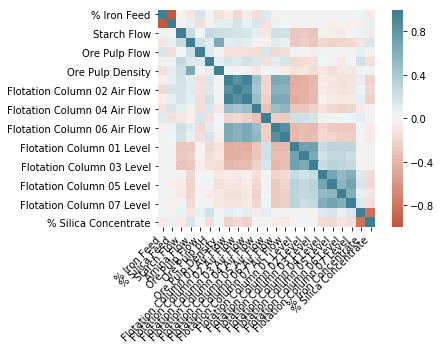

In [8]:
#corr = raw.corr(method='spearman')
corr = raw.corr(method='pearson')
print (corr)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
# Scatter matrix ("all vs all"), with KDE diagonal
pd.plotting.scatter_matrix(raw, alpha=0.9, figsize=(10, 10), diagonal='kde')
plt.show()

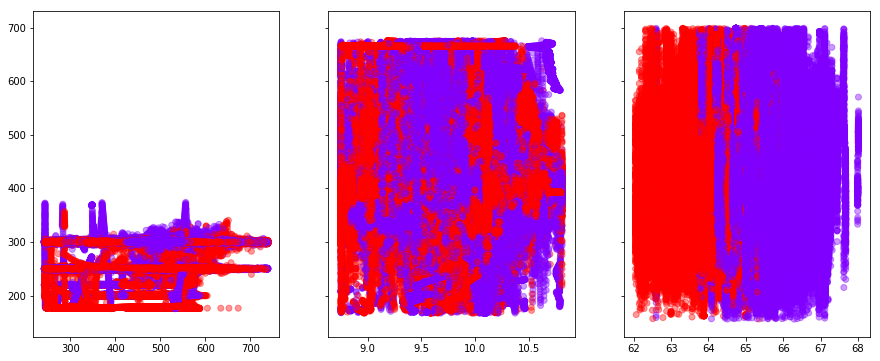

In [31]:
# As 6 variáveis com maior correlação, separando '% Silica Concentrate' pela mediana 
threshold=raw['% Silica Concentrate']>2.3

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(15,6))
ax1.scatter(raw['Amina Flow'], raw['Flotation Column 01 Air Flow'],c=threshold, cmap='rainbow', alpha=0.4)
ax2.scatter(raw['Ore Pulp pH'], raw['Flotation Column 05 Level'],c=threshold, cmap='rainbow', alpha=0.4)
ax3.scatter(raw['% Iron Concentrate'], raw['Flotation Column 06 Level'],c=threshold, cmap='rainbow', alpha=0.4)

# Data transformations
* Normalization
* weight colum by the correlation (reinforce important columns)
* Naive assumption: desconsider the time, cause the sample rate (for the interest variable) is low

In [6]:
# Normalization
normalized = raw.drop('date', axis=1)
normalized = normalized.drop('% Silica Concentrate', axis=1)
normalized = (normalized-normalized.min())/(normalized.max()-normalized.min())

In [7]:
for i in range(0, 21):
    weighted[weighted.columns[i]] = normalized[normalized.columns[i]]*((abs(corr.iloc[22][i]) + 1)**3)
weighted.describe()

NameError: name 'corr' is not defined

# Kmeans Clustering
* k selection using the Elbow method
* Some plots for the selected k
* Evaluation?

In [5]:
from sklearn.cluster import KMeans

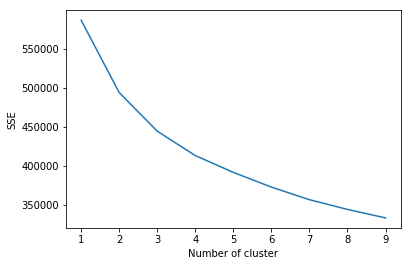

In [84]:
sse = {}
for k in range(1, 10):
    model = KMeans(n_clusters=k, max_iter=1000).fit(weighted)
    #data["clusters"] = model.labels_
    #print(data["clusters"])
    sse[k] = model.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [9]:
model = KMeans(n_clusters=3)
model.fit(normalized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [ ]:
plt.scatter 

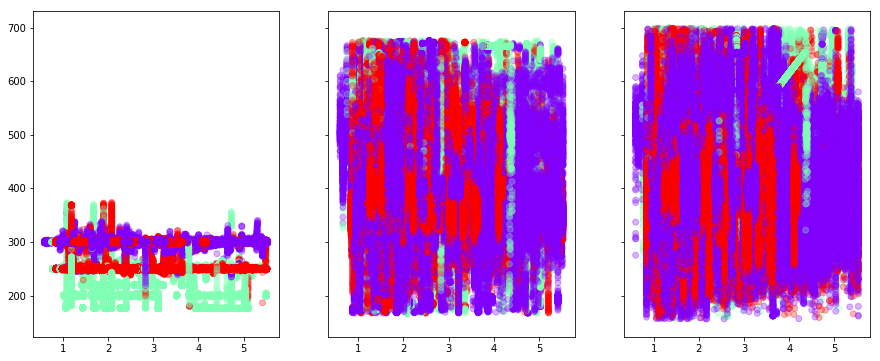

In [11]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(15,6))

ax1.scatter(raw['% Silica Concentrate'], raw['Flotation Column 01 Air Flow'],c=model.labels_, cmap='rainbow', alpha=0.3)
ax2.scatter(raw['% Silica Concentrate'], raw['Flotation Column 05 Level'],c=model.labels_, cmap='rainbow', alpha=0.3)
ax3.scatter(raw['% Silica Concentrate'], raw['Flotation Column 06 Level'],c=model.labels_, cmap='rainbow', alpha=0.3)

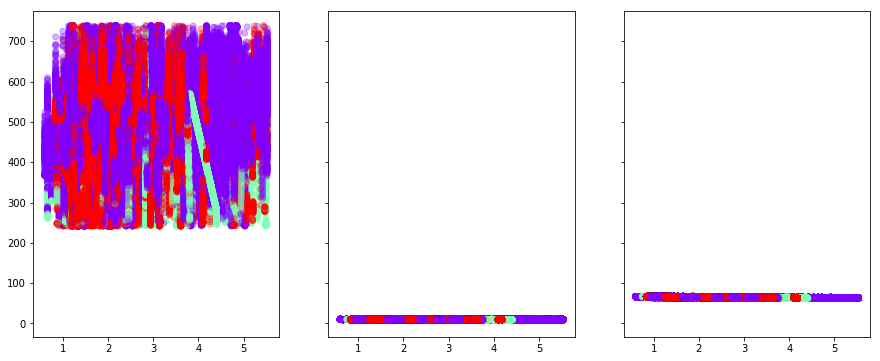

In [12]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(15,6))

ax1.scatter(raw['% Silica Concentrate'], raw['Amina Flow'],c=model.labels_, cmap='rainbow', alpha=0.3)
ax2.scatter(raw['% Silica Concentrate'], raw['Ore Pulp pH'],c=model.labels_, cmap='rainbow', alpha=0.3)
ax3.scatter(raw['% Silica Concentrate'], raw['% Iron Concentrate'],c=model.labels_, cmap='rainbow', alpha=0.3)

In [83]:
raw[model.labels_ == 0]['% Silica Concentrate'].describe()

count    158606.000000
mean     2.560018     
std      1.176272     
min      0.660000     
25%      1.590000     
50%      2.260000     
75%      3.360000     
max      5.500000     
Name: % Silica Concentrate, dtype: float64

In [84]:
raw[model.labels_ == 1]['% Silica Concentrate'].describe()

count    275178.000000
mean     2.351641     
std      1.139992     
min      0.600000     
25%      1.460000     
50%      2.050000     
75%      2.930000     
max      5.530000     
Name: % Silica Concentrate, dtype: float64

In [82]:
raw[model.labels_ == 2]['% Silica Concentrate'].describe()

count    303669.000000
mean     2.182391     
std      1.061339     
min      0.840000     
25%      1.370000     
50%      1.820000     
75%      2.720000     
max      5.530000     
Name: % Silica Concentrate, dtype: float64

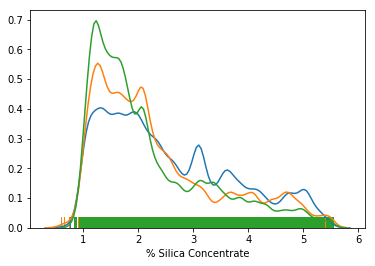

In [93]:
sns.distplot(raw[model.labels_ == 0]['% Silica Concentrate'], hist=False, rug=True)
sns.distplot(raw[model.labels_ == 1]['% Silica Concentrate'], hist=False, rug=True)
sns.distplot(raw[model.labels_ == 2]['% Silica Concentrate'], hist=False, rug=True)